In [1]:
import pickle

import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import question2b_utils

DUMP_FILE = "datasets/duplicate.pickle_6.dat"
data = pd.read_csv('datasets/quora_features.csv')
data.describe()

,Id,IsDuplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,...,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
count,283004.000000,283004.000000,283004.000000,283004.000000,283004.000000,283004.000000,283004.000000,283004.000000,283004.000000,283004.000000,...,283004.000000,283004.000000,283004.000000,283004.000000,283004.000000,282660.000000,283004.000000,283004.000000,283004.000000,283004.000000
mean,141501.500000,0.371454,59.515717,60.105451,-0.589734,20.224608,20.210725,10.938312,11.182718,4.511431,...,9.174632,0.928143,131.809551,0.663124,0.299136,0.370390,0.010088,0.010164,-0.059981,-0.061563
std,81696.362128,0.483194,29.899910,33.927668,32.627043,4.175143,4.306632,5.421175,6.324499,3.097351,...,4.314565,0.258246,48.897947,0.311696,0.140675,0.200127,0.135342,0.134905,0.307565,0.306020
min,0.000000,0.000000,1.000000,1.000000,-1080.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.606709,-0.624702,-3.000000,-3.000000
25%,70750.750000,0.000000,39.000000,39.000000,-11.000000,17.000000,17.000000,7.000000,7.000000,2.000000,...,6.603453,1.000000,112.803387,0.477199,0.215246,0.245750,-0.080322,-0.080255,-0.238769,-0.240017
50%,141501.500000,0.000000,52.000000,51.000000,0.000000,20.000000,20.000000,10.000000,10.000000,4.000000,...,9.207214,1.000000,138.607646,0.665615,0.300123,0.352408,0.011222,0.011253,-0.081923,-0.083068
75%,212252.250000,1.000000,72.000000,71.000000,12.000000,23.000000,23.000000,13.000000,13.000000,6.000000,...,11.875152,1.000000,161.406078,0.857946,0.386972,0.474458,0.101190,0.100508,0.102183,0.100110
max,283003.000000,1.000000,623.000000,1169.000000,487.000000,52.000000,55.000000,125.000000,237.000000,38.000000,...,20.709869,1.000000,300.000000,1.496936,0.682163,1.101037,0.635261,0.781670,2.288984,2.227666


Finished


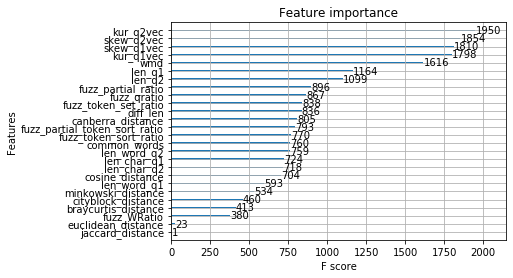

In [3]:
y = question2b_utils.get_target_values(data)
x = question2b_utils.get_data_for_model(data)

bst = pickle.load(open(DUMP_FILE, "rb"))

_, x_valid, _, y_valid = train_test_split(x, y, test_size=0.2, random_state=4242)

x_matrix = xgb.DMatrix(x_valid, label=y_valid)
prediction = bst.predict(x_matrix)

xgb.plot_importance(bst)
print("Finished")

In [6]:

pred_norm = [int(x > 0.5) for x in prediction]
report = classification_report(y_valid, pred_norm)

print(report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     35456
           1       0.67      0.74      0.71     21145

    accuracy                           0.77     56601
   macro avg       0.76      0.76      0.76     56601
weighted avg       0.78      0.77      0.77     56601

